# I. Importing Data

The data I am using for this example is was scraped from this url - https://www.goodcarbadcar.net/2022-us-vehicle-sales-figures-by-model/, and then transposed into a CSV; the data consists of the sales of 111 SUVs split between 12 different car companies. There are 7 columns involving the Name of the SUV, monthly sales, monthly sales last year, percentage change, year to date sales, year to date sales last year, and lastly the percentage change of the yearly sales. 



In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [3]:
#Data has been scraped, this is now useless
# Data has been scraped from the URL below
url = ("https://www.goodcarbadcar.net/2022-us-vehicle-sales-figures-by-model/")
header = {
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'
}
r = requests.get(url)
dft = pd.read_html(r.text)
dft[0].to_csv('Car.csv')

In [4]:
# Old dataset
# 111 x 7 
dfPre = pd.read_csv("Car.csv")
dfPre.head(111)

,Unnamed: 0,Model,Month,Month LY,Change,YTD,YTD LY,YTD Change
0,0,Mazda 3,2778,2514,10.50,22758,37325,-39.03
1,1,Toyota 4Runner,11333,13032,-13.04,104752,118507,-11.61
2,2,Volvo 60-Series,648,1029,-37.03,6169,11442,-46.08
3,3,Volvo 90-Series,113,70,61.43,1517,1263,20.11
4,4,Hyundai Accent,1683,2863,-41.22,16982,16953,0.17
...,...,...,...,...,...,...,...,...
106,106,Hyundai Venue,1465,2255,-35.03,21070,18223,15.62
107,107,Toyota Venza,3705,3251,13.96,26836,53744,-50.07
108,108,Volvo XC40,1908,1987,-3.98,13727,24076,-42.98
109,109,Volvo XC60,3611,3032,19.10,29364,34615,-15.17


In [5]:
#Reads CSV from the scraped website
# Parsed the Title and the name to make two seperate columns, one for the name, one for the maker.
df = pd.read_csv('Car2.csv')

In [6]:
# First five data points. There were a couple of SUVs released in 2022 and do not have data
# for Month LY as well as YTD Last year, they were radically skewing the data so I decided to 
# take them out as to not significantly influence averages, and calculations. 
df.head()

,Model,Make,Month,Month LY,moChangePerc,YTD,YTD LY,ytdChangePerc
0,3,Mazda,2778,2514,10.50,22758,37325,-39.03
1,4Runner,Toyota,11333,13032,-13.04,104752,118507,-11.61
2,60-Series,Volvo,648,1029,-37.03,6169,11442,-46.08
3,90-Series,Volvo,113,70,61.43,1517,1263,20.11
4,Accent,Hyundai,1683,2863,-41.22,16982,16953,0.17


In [7]:
df.tail()

,Model,Make,Month,Month LY,moChangePerc,YTD,YTD LY,ytdChangePerc
106,Venue,Hyundai,1465,2255,-35.03,21070,18223,15.62
107,Venza,Toyota,3705,3251,13.96,26836,53744,-50.07
108,XC40,Volvo,1908,1987,-3.98,13727,24076,-42.98
109,XC60,Volvo,3611,3032,19.10,29364,34615,-15.17
110,XC90,Volvo,2742,2583,6.16,28023,32680,-14.25


In [8]:
df.columns

Index(['Model', 'Make', 'Month', 'Month LY', 'moChangePerc', 'YTD', 'YTD LY',
       'ytdChangePerc'],
      dtype='object')

# II. Organizing 

 Initially a cars model, and company, were in the same column so I went through and seperated each car and company to their own row so I can make subsets of each company, as well as for a cleaner view. Secondly, the initial dataset gave us the month, month last year, as well as the percentage change, but not the raw value difference; I created a column that gives us the raw value of each difference between the monthly sales in comparison to the monthly sales last year, as well as the yearly counter part. 

 I created a column that compares the monthly sales, and monthly sales of last year, and if this years sales were high than last, labeled the column as growth, if it was lower, it would then be labeled as decay, giving us a quick categorical visual as to whether the car, and companies, had a monthly or yearly growth or decay. (Mostly were decay, there appears to be a bear market for cars this year) 

 After creating these new columns, I organized every car company into their own subset, in case we only wanted to look at ford, who had some of the top selling SUVs in this dataset, or honda, who had some of the worst selling SUVs this year in comparison to last years in this data set.

 Once I created the subsets, I created data sets thats ogranized certain values from highest to lowest, and lowest to highest; that way we could look at the top 5 data points in any column, or the lowest five. I could do this for every variable, and every car company, but for the sake of brevity, and showcase, I decided to only do the ones displayed in the analysis section. 
    

  Lastly there were seven data points that had SUVs that were released in 2022, and therefore didnt have data points for the LY column for both monthly, and yearly. I decide to ommit these data points in order to not significantly skew the averages, descriptive statistics, as well as the graphs.

   I tried adding paragraphs to one cohesive block of text, but when I ran the cell it automatically compressed the abstract into a giant wall of text, I then seperated each paragraph to each cell, but this also looks funky to me. I will do the block of text for the next step, please tell me which style you would prefer for future analysis.

In [9]:
# Reordering the columns to take out the unneccesary ID column
df = df[["Make", "Model",'Month', 'Month LY', 'moChangePerc', 'YTD',"YTD LY","ytdChangePerc"]]

In [10]:
# Double checking to make sure everything is in its proper place
df.head()

,Make,Model,Month,Month LY,moChangePerc,YTD,YTD LY,ytdChangePerc
0,Mazda,3,2778,2514,10.50,22758,37325,-39.03
1,Toyota,4Runner,11333,13032,-13.04,104752,118507,-11.61
2,Volvo,60-Series,648,1029,-37.03,6169,11442,-46.08
3,Volvo,90-Series,113,70,61.43,1517,1263,20.11
4,Hyundai,Accent,1683,2863,-41.22,16982,16953,0.17


In [11]:
# Creates a equation to calculate the monthly and yearly difference. The table only gave us the percentage, I gave us the raw number
df['moDiff'] = df['Month'] - df['Month LY']
df['ytdDiff'] = df['YTD'] - df['YTD LY']

In [12]:


# Creates a column to where if the monthly sales is less than last year, it will be labeled as decay.
# However if the monthly sales are greater than last year, it is considered growth.
# Same for YTD, and YTD LY.
df['moGrowth'] = np.where(df['Month']>df['Month LY'], 'Growth', 'Decay')
df['ytdGrowth'] = np.where(df['YTD']>df['YTD LY'], 'Growth', 'Decay')

# Organizes data points from the year to date difference column from highest to lowest, and vice versa respectively
dfYtdDiffAsc = df.sort_values(['ytdDiff'], ascending=False)
dfYtdDiffDsc = df.sort_values(['ytdDiff'], ascending=True)

In [13]:
# Creates a subset of each make in case you only want to do analyis on Ford, Toyota, Etc.
Ford = df[df.Make =='Ford']
Toyota = df[df.Make =='Toyota']
Hyundai = df[df.Make =='Hyundai']
Lexus = df[df.Make =='Lexus']
Honda = df[df.Make =='Honda']
Subaru = df[df.Make =='Subaru']
Genesis = df[df.Make =='Genesis']
Mazda = df[df.Make =='Mazda']
Volvo = df[df.Make =='Volvo']
Lincoln = df[df.Make =='Lincoln']
Acrua = df[df.Make =='Acura']

# 2+ subsets into one data set in case you only want to look at Ford and Toyota, or only certain car companies.
fordToyota = pd.concat([Ford,Toyota], sort=False)

# Sorts values from highest to lowest for the monthly differnces for the ford car company
# Sorts values form highet to lowest year to date for the volvo car company
moFordDiffAsc = Ford.sort_values(['moDiff'], ascending=False)
moFordAsc = Ford.sort_values(['Month'], ascending=False)
ytdVolvoDiffAsc = Volvo.sort_values(['YTD'], ascending=False)
moToyotaDiffAsc = Toyota.sort_values(['Month'], ascending=False)
dfMoDiff = df.sort_values(['moDiff'], ascending=False)

# Creates a data set with the SUVs who have the highest YTD sales. 
fSeries = df[df.Model =='F-Series']
RAV4 = df[df.Model =='RAV4']
Camry = df[df.Model =='Camry']
CRV = df[df.Model =='CR-V']
Corolla = df[df.Model =='Corolla']
topFive = pd.concat([fSeries,RAV4,Camry,CRV,Corolla], sort=False)

# How many SUVs each car company has in this data set.  
df['Make'].value_counts()

Ford       16
Toyota     15
Hyundai    12
Kia        11
Lexus      10
Honda       9
Subaru      8
Genesis     5
Volvo       5
Mazda       5
Lincoln     4
Acura       4
Name: Make, dtype: int64

In [14]:
# Reoarganizing colmuns for a better snapshot visual
df = df[["Make", "Model" , 'Month', 'Month LY', 'moDiff', 'moChangePerc', 'moGrowth', 'YTD',"YTD LY",'ytdDiff',"ytdChangePerc", 'ytdGrowth']]

In [15]:
# Creates a data set with cars that have only growth, or decay, for the monthly, and yearly sales.
moGrowth = df[df.moGrowth =='Growth']
moDecay = df[df.moGrowth =='Decay']
ytdGrowth = df[df.ytdGrowth =='Growth']
ytdDecay = df[df.ytdGrowth =='Decay']

# Ogranizes all the datapoints with a monthly growth from highest to lowest or vice versa, based of change in percentage
# I can make subsets ranking every nominal variable from hight to low but for the sake of brevity, only did monthly growth
moGrowthAsc = moGrowth.sort_values(['moChangePerc'], ascending=False)
moGrowthDsc = moDecay.sort_values(['moChangePerc'], ascending=True)

# Creates data sets organizing monthly sales from highest to lowest, and lowest to highest respectively.
moSalesAsc = df.sort_values(['Month'], ascending=False)
moSalesDsc = df.sort_values(['Month'], ascending=True)


# Creates data sets organizing monthly sales from highest to lowest, and lowest to highest respectively.
moFordSalesAsc = Ford.sort_values(['Month'], ascending=False)
moFordSalesDsc = Ford.sort_values(['Month'], ascending=True)

# III. Analysis 

In [16]:
# Based off of monthly percentage growth, the cars with the most monthly growth appear to be:

# 1. Subaru BRZ with a monthly growth of 1058.33%
# 2. Toyota Crolla Cross with a monthly growth of 798.18%
# 3. Acura NSCX with a monthly growth of 400.00%
# 4. Lexus IS with a monthly growth of 314.48%
# 5. Subaru Forester with a monthly growth of 148.01%

moGrowthAsc.head(10)  

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
11,Subaru,BRZ,278,24,254,1058.33,Growth,2708,746,1962,263.00,Growth
17,Toyota,Corolla Cross,7419,826,6593,798.18,Growth,44940,826,44114,5340.68,Growth
71,Acura,NSX,25,5,20,400.00,Growth,236,123,113,91.87,Growth
53,Lexus,IS,1488,359,1129,314.48,Growth,17819,20519,-2700,-13.16,Decay
34,Subaru,Forester,11954,4820,7134,148.01,Growth,91359,137074,-45715,-33.35,Decay
60,Ford,Maverick,9233,4140,5093,123.02,Growth,61035,4646,56389,1213.71,Growth
90,Toyota,Sequoia,988,450,538,119.56,Growth,1495,6561,-5066,-77.21,Decay
94,Kia,Sportage,11877,5459,6418,117.57,Growth,100615,78324,22291,28.46,Growth
20,Mazda,CX-30,6666,3147,3519,111.82,Growth,44053,45616,-1563,-3.43,Decay
16,Toyota,Corolla,16663,8420,8243,97.90,Growth,188219,200369,-12150,-6.06,Decay


In [17]:
# The cars with the lowest monthly percentage change appear to be:

# 1. Hyundai Ioniq with a monlthy percentage change of -99.94%
# 2. Toyota Avalon with a monlthy percentage change of -96.08%
# 3. Honda Insight with a monlthy percentage change of -95.67%
# 4. Acura RDX with a monlthy percentage change of -70.69%
# 4. KIA Stinger with a monlthy percentage change of -70.69%

# I could have also calculated the top/low 5 with the differences in number of units sold,
# using the monlthy difference column, but decided to go for relative growth and decay
# using the percentage change instead. 

moGrowthDsc.head(10)

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
51,Hyundai,Ioniq,1,1621,-1620,-99.94,Decay,3670,16467,-12797,-77.71,Decay
7,Toyota,Avalon,46,1172,-1126,-96.08,Decay,12190,15959,-3769,-23.62,Decay
49,Honda,Insight,84,1939,-1855,-95.67,Decay,7623,18206,-10583,-58.13,Decay
82,Acura,RDX,1557,5313,-3756,-70.69,Decay,18436,49549,-31113,-62.79,Decay
95,Kia,Stinger,430,1274,-844,-66.25,Decay,7073,11651,-4578,-39.29,Decay
105,Hyundai,Veloster,83,218,-135,-61.93,Decay,1876,1871,5,0.27,Growth
12,Toyota,C-HR,496,1296,-800,-61.73,Decay,10809,33684,-22875,-67.91,Decay
69,Hyundai,Nexo,30,63,-33,-52.38,Decay,375,336,39,11.61,Growth
62,Toyota,Mirai,152,306,-154,-50.33,Decay,1589,2574,-985,-38.27,Decay
38,Genesis,G90,103,203,-100,-49.26,Decay,889,1469,-580,-39.48,Decay


In [18]:
# The cars with the highest monthly sales appear to be:

# 1. Ford F-Series with monthly sales of 56,405
# 2. Toyota RAV4 with monthly sales of 35,089
# 3. Toyota Camry with monthly sales of 29,707
# 4. Toyota Tacoma with monthly sales of 21,051
# 5. Honda CR-V with monthly sales 20,517


moSalesAsc.head(10)

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
33,Ford,F-Series,56405,68259,-11854,-17.37,Decay,523712,603089,-79377,-13.16,Decay
80,Toyota,RAV4,35089,24994,10095,40.39,Growth,305230,338441,-33211,-9.81,Decay
14,Toyota,Camry,29707,17691,12016,67.92,Growth,244110,274460,-30350,-11.06,Decay
97,Toyota,Tacoma,21051,14650,6401,43.69,Growth,175453,215251,-39798,-18.49,Decay
18,Honda,CR-V,20517,25393,-4876,-19.20,Decay,199204,315533,-116329,-36.87,Decay
45,Toyota,Highlander,17962,18103,-141,-0.78,Decay,182413,225667,-43254,-19.17,Decay
16,Toyota,Corolla,16663,8420,8243,97.90,Growth,188219,200369,-12150,-6.06,Decay
32,Ford,Explorer,15887,20714,-4827,-23.30,Decay,172220,180888,-8668,-4.79,Decay
103,Hyundai,Tuscon,15066,9735,5331,54.76,Growth,140691,115554,25137,21.75,Growth
19,Subaru,CrossTrek,13635,10591,3044,28.74,Growth,128979,111658,17321,15.51,Growth


In [19]:
# The cars with the lowest monthly sales appear to be:

# 1. Hyundai Ioniq with monthly sale of 1
# 2. Ford GT with monthly sales of 8
# 3. Acura NSX with monthly sales of 25
# 4. Hyundai Nexo with monthly sales of 30
# 5. Toyota Avalon with monthly sales of 46

moSalesDsc.head(10)

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
51,Hyundai,Ioniq,1,1621,-1620,-99.94,Decay,3670,16467,-12797,-77.71,Decay
40,Ford,GT,8,12,-4,-33.33,Decay,83,115,-32,-27.83,Decay
71,Acura,NSX,25,5,20,400.00,Growth,236,123,113,91.87,Growth
69,Hyundai,Nexo,30,63,-33,-52.38,Decay,375,336,39,11.61,Growth
7,Toyota,Avalon,46,1172,-1126,-96.08,Decay,12190,15959,-3769,-23.62,Decay
105,Hyundai,Veloster,83,218,-135,-61.93,Decay,1876,1871,5,0.27,Growth
49,Honda,Insight,84,1939,-1855,-95.67,Decay,7623,18206,-10583,-58.13,Decay
56,Lexus,LC,102,178,-76,-42.70,Decay,1095,2550,-1455,-57.06,Decay
38,Genesis,G90,103,203,-100,-49.26,Decay,889,1469,-580,-39.48,Decay
3,Volvo,90-Series,113,70,43,61.43,Growth,1517,1263,254,20.11,Growth


In [20]:
df['moGrowth'].value_counts()

Decay     56
Growth    48
Name: moGrowth, dtype: int64

In [21]:

df['ytdGrowth'].value_counts()

Decay     79
Growth    25
Name: ytdGrowth, dtype: int64

In [22]:
moFordSalesAsc.head(20)

,Make,Model,Month,Month LY,moChangePerc,YTD,YTD LY,ytdChangePerc,moDiff,ytdDiff,moGrowth,ytdGrowth
33,Ford,F-Series,56405,68259,-17.37,523712,603089,-13.16,-11854,-79377,Decay,Decay
32,Ford,Explorer,15887,20714,-23.30,172220,180888,-4.79,-4827,-8668,Decay,Decay
9,Ford,Bronco,10928,7364,48.40,97315,17568,453.93,3564,79747,Growth,Growth
100,Ford,Transit,10663,7862,35.63,78996,86661,-8.84,2801,-7665,Growth,Decay
29,Ford,Escape,9966,13500,-26.18,119277,125291,-4.80,-3534,-6014,Decay,Decay
60,Ford,Maverick,9233,4140,123.02,61035,4646,1213.71,5093,56389,Growth,Growth
10,Ford,Bronco Sport,7372,9201,-19.88,87348,90405,-3.38,-1829,-3057,Decay,Decay
31,Ford,Expedition,6118,5648,8.32,47725,69852,-31.68,470,-22127,Growth,Decay
26,Ford,Edge,5133,9329,-44.98,72756,64280,13.19,-4196,8476,Decay,Growth
79,Ford,Ranger,4009,7218,-44.46,50302,79924,-37.06,-3209,-29622,Decay,Decay


In [23]:
Ford.describe()

,Month,Month LY,moChangePerc,YTD,YTD LY,ytdChangePerc,moDiff,ytdDiff
count,16.000000,16.0000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,9357.562500,10380.3125,4.293750,90925.812500,92251.812500,96.486875,-1022.750000,-1326.000000
std,13237.232042,16276.1364,42.560241,123106.932793,144328.860936,320.074714,3987.362896,34307.166449
min,8.000000,12.0000,-44.980000,83.000000,115.000000,-37.060000,-11854.000000,-79377.000000
25%,3532.750000,3019.0000,-24.020000,30307.250000,21542.000000,-17.367500,-3290.250000,-8238.250000
50%,5625.500000,6433.0000,-1.100000,55668.500000,54195.500000,-6.820000,101.500000,-5322.000000
75%,10140.250000,9233.0000,24.792500,89839.750000,87597.000000,6.560000,545.500000,2806.750000
max,56405.000000,68259.0000,123.020000,523712.000000,603089.000000,1213.710000,5093.000000,79747.000000


In [24]:
Ford["moGrowth"].value_counts()

Decay     8
Growth    8
Name: moGrowth, dtype: int64

In [25]:
Ford["ytdGrowth"].value_counts()

Decay     11
Growth     5
Name: ytdGrowth, dtype: int64

In [26]:
# Sum of monthly differences 
moFordSum = Ford['moDiff'].sum()
print(moFordSum)

-16364


In [27]:
# Sum of yearly differences 
yFordSum = Ford['ytdDiff'].sum()
print(yFordSum)

-21216


In [28]:
# Sum of monthly percentage change 
moPercFordSum = Ford['moChangePerc'].sum()
print(moPercFordSum)

68.69999999999999


In [29]:
# Sum of yearly percentage change
ytdPercFordSum = Ford['ytdChangePerc'].sum()
print(ytdPercFordSum)

1543.79


The monthly difference tells a different story, data supports there is an average of 258 units being sold, with relatively high variance, and a stand deviation of 3,044. Unlike yearly differences, if you sold 1 unit, you would only be in the top 50% of SUVs in this data set. The data supports a monthly bull trend, but a yearly bear trend.

In [30]:
df.describe()

,Month,Month LY,moDiff,moChangePerc,YTD,YTD LY,ytdDiff,ytdChangePerc
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,5917.903846,5659.153846,258.750000,26.221442,55991.692308,65629.798077,-9638.105769,57.889808
std,7956.857566,8153.266856,3044.756683,145.305642,73424.115136,86699.307532,24967.183611,543.034866
min,1.000000,5.000000,-11854.000000,-99.940000,83.000000,115.000000,-122341.000000,-88.760000
25%,1257.000000,1354.750000,-792.500000,-33.345000,11844.750000,16340.000000,-17109.750000,-36.067500
50%,3501.000000,3111.500000,-73.000000,-4.250000,29588.500000,34372.000000,-4898.000000,-15.620000
75%,8321.500000,7736.750000,777.500000,35.877500,79950.750000,79160.500000,-443.000000,-2.660000
max,56405.000000,68259.000000,12016.000000,1058.330000,523712.000000,603089.000000,79747.000000,5340.680000


In [31]:
# Calculates the total of monthly differences which supports a bullish, monthly market for SUVs in this dataset.
dfMoDiffSum = df['moDiff'].sum()
print(dfMoDiffSum)

26910


In [32]:
# Calculates the total of yearly differences which supports a bearish, yearly market for SUVs in this dataset.
dfYtdDiffSum = df['ytdDiff'].sum()
print(dfYtdDiffSum)

-1002363


In [33]:
# Ranks year to date differnces from highest to lowest
dfYtdAsc = df.sort_values(['YTD'], ascending=False)
dfYtdAsc.head(5)

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
33,Ford,F-Series,56405,68259,-11854,-17.37,Decay,523712,603089,-79377,-13.16,Decay
80,Toyota,RAV4,35089,24994,10095,40.39,Growth,305230,338441,-33211,-9.81,Decay
14,Toyota,Camry,29707,17691,12016,67.92,Growth,244110,274460,-30350,-11.06,Decay
18,Honda,CR-V,20517,25393,-4876,-19.20,Decay,199204,315533,-116329,-36.87,Decay
16,Toyota,Corolla,16663,8420,8243,97.90,Growth,188219,200369,-12150,-6.06,Decay


In [34]:
# Ranks year to date differnces from lowest to highest. The bottom Five
dfYtdDsc = df.sort_values(['YTD'], ascending=True)
dfYtdDsc.head(5)

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
40,Ford,GT,8,12,-4,-33.33,Decay,83,115,-32,-27.83,Decay
71,Acura,NSX,25,5,20,400.00,Growth,236,123,113,91.87,Growth
69,Hyundai,Nexo,30,63,-33,-52.38,Decay,375,336,39,11.61,Growth
38,Genesis,G90,103,203,-100,-49.26,Decay,889,1469,-580,-39.48,Decay
56,Lexus,LC,102,178,-76,-42.70,Decay,1095,2550,-1455,-57.06,Decay


# IV Visualizing

Very ugly graph from the X-axis i must admit, however this gives us a snapshot view of all the SUVs and their monthly differnces. From this graph data supports an average hovering anywhere between about 1,000 to -1,000 and then starts to signficantly spike on both ends from there. The data also supports a couple of major outliers from the monthly differences which we will support with further graphs, as well as talked about in the analyzation section. When creating these graphs sometimes I would rerun a cell, and would give me a wonky graph, I would refresh the cell and it eventually would give me the size that is appropriate. If some of these graphs are hard to see, right clicking, and opening the graph in a new tab would make things a lot more visible.

<AxesSubplot:xlabel='Model', ylabel='moDiff'>

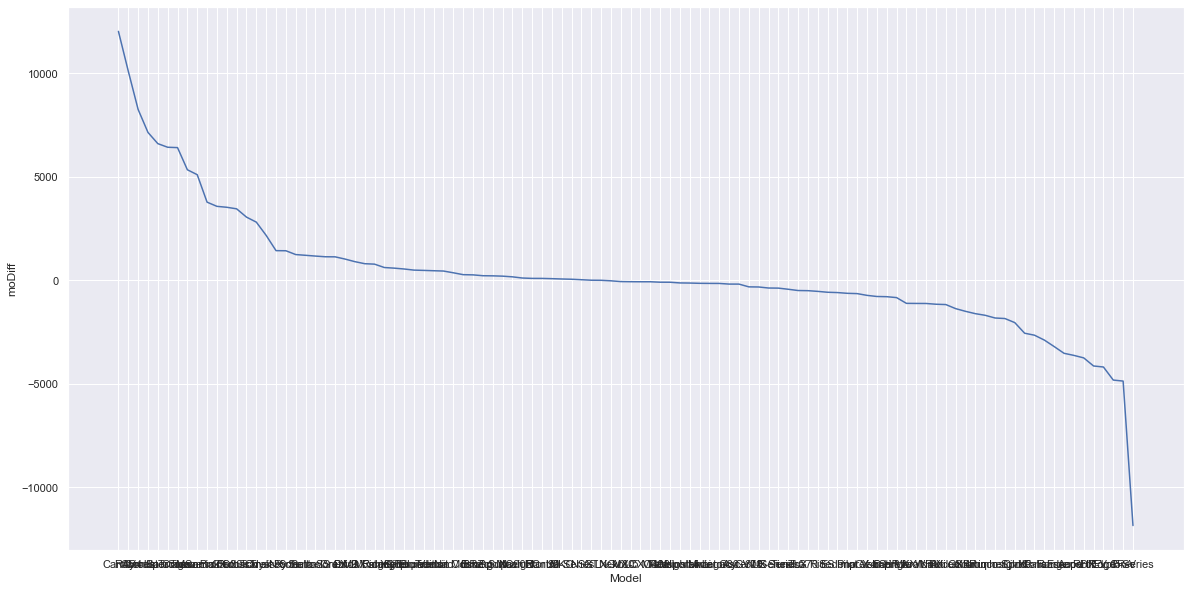

In [35]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(20, 10)})

# Plot the responses for different events and regions
sns.lineplot(x="Model", y="moDiff",data=dfMoDiff)

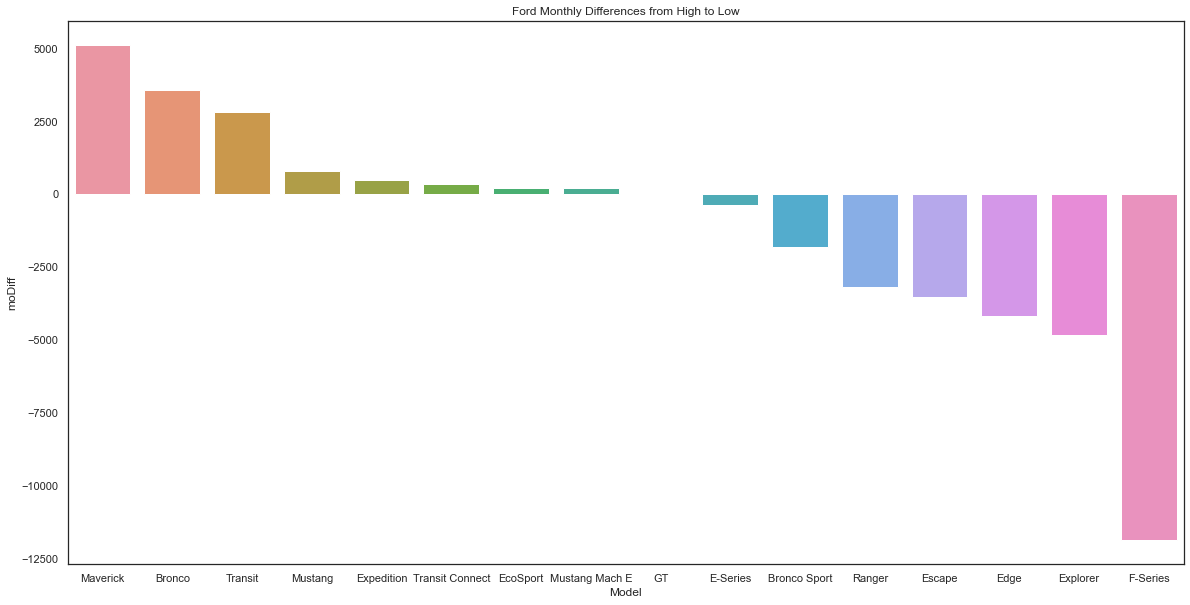

In [36]:
# Ford monthly differences from hight to low
sns.set(style="white")
seaborn = sns.barplot (x = 'Model', y = 'moDiff', data = moFordDiffAsc )
sns.set(rc={"figure.figsize":(20, 10)})
plt.title('Ford Monthly Differences from High to Low')
plt.show()

Text(0.5, 1.0, 'Ford Monthly Sales Pivot Bar Graph')

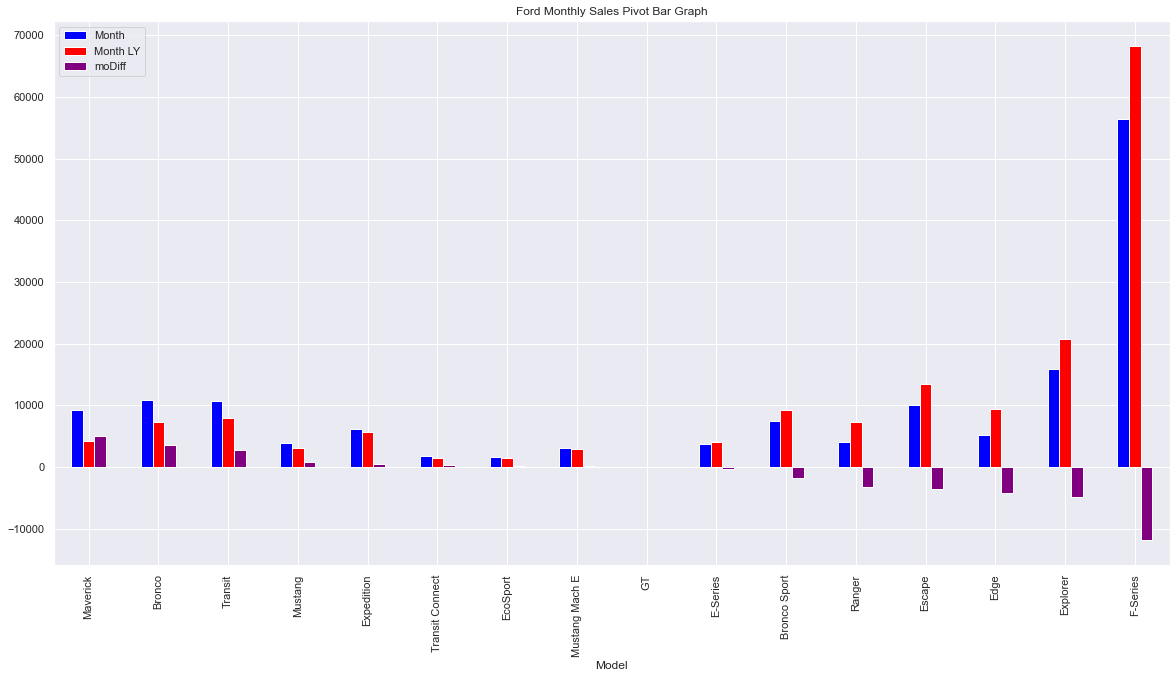

In [37]:
moFordDiffAsc[['Model', 'Month', 'Month LY', 'moDiff']].plot(x='Model', kind='bar', color=['blue', 'red',"purple"])
plt.title('Ford Monthly Sales Pivot Bar Graph')

Text(0.5, 1.0, 'XC60 vs XC90 vs XC40')

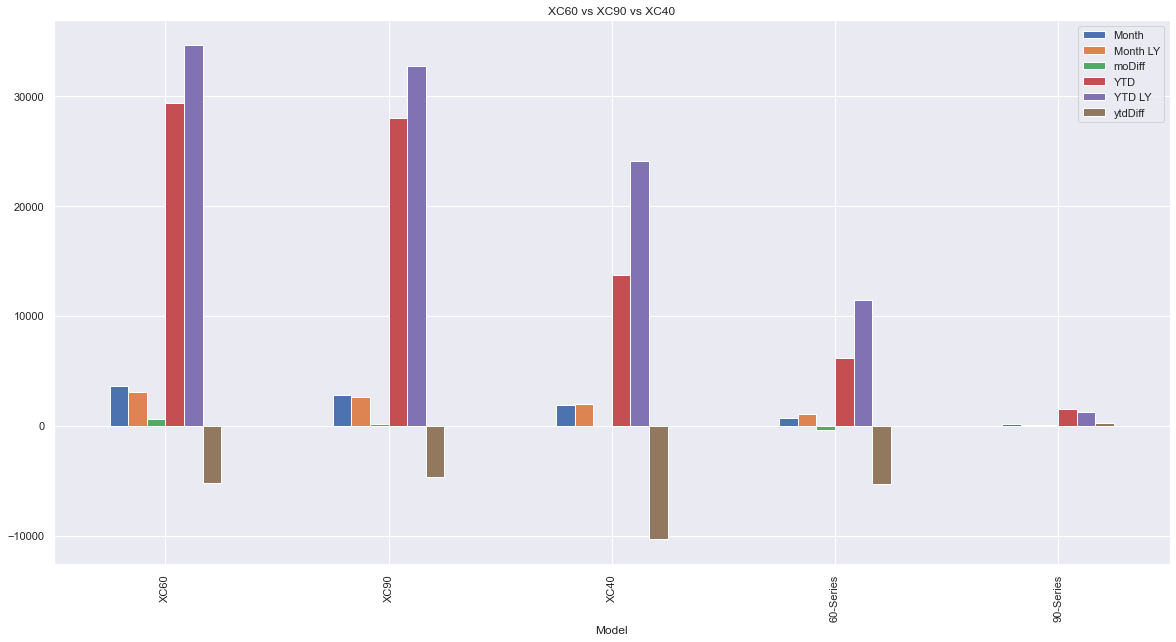

In [38]:
ytdVolvoDiffAsc[['Model', 'Month', 'Month LY', 'moDiff', 'YTD', 'YTD LY', 'ytdDiff']].plot(x='Model', kind='bar')
sns.set(rc={"figure.figsize":(20, 10)})
plt.title('XC60 vs XC90 vs XC40')

Text(0.5, 1.0, 'Toyota Monthly Sales Comparison')

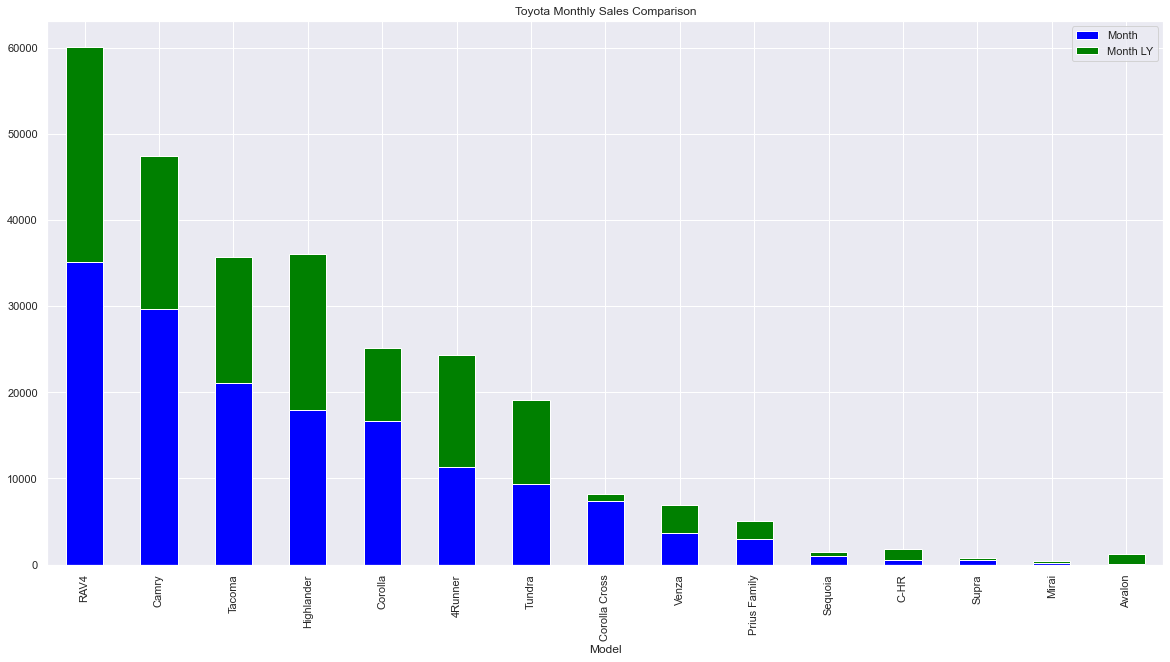

In [39]:
# Stacked bar graph comparing Month and Month LY for all Toyota SUVs, from highest monthly sales to lowest 
moToyotaDiffAsc[['Model', 'Month', 'Month LY']].plot(x='Model', kind='bar', stacked=True, color=['blue', 'green',])
plt.title('Toyota Monthly Sales Comparison')

Text(0.5, 1.0, 'Ford F-Series Data Point Spread')

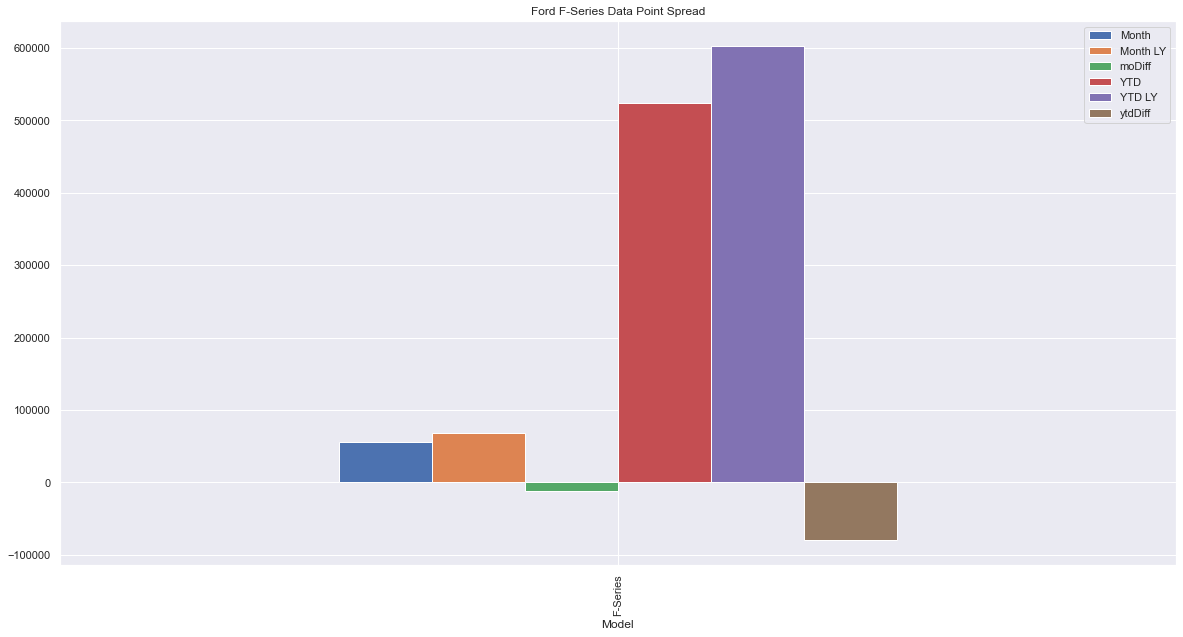

In [40]:
# Graphs an Individual Model, and all of its numeric values
# Even though the F-Series is the best seller for forward, it still is seeing a monthly and yearly decay. 
fSeries = df[df.Model =='F-Series']
fSeries[['Model', 'Month', 'Month LY', 'moDiff', 'YTD', 'YTD LY', 'ytdDiff']].plot(x='Model', kind='bar')
sns.set(rc={"figure.figsize":(20, 10)})
plt.title('Ford F-Series Data Point Spread')


Text(0.5, 1.0, 'Ford Monthly Differences')

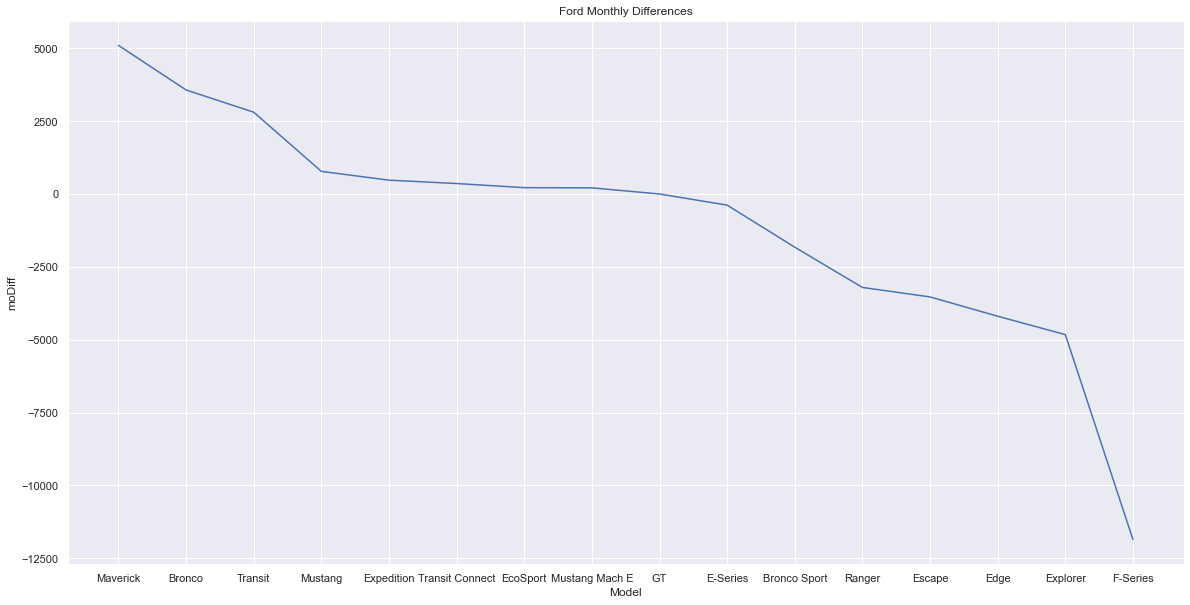

In [41]:
# Models a line graph depicting the monthly differences within ford.  
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(20, 10)})
# Plot the responses for different events and regions
sns.lineplot(x="Model", y="moDiff",data=moFordDiffAsc)
plt.title('Ford Monthly Differences')

In [42]:
topFive.head()

,Make,Model,Month,Month LY,moChangePerc,YTD,YTD LY,ytdChangePerc,moDiff,ytdDiff,moGrowth,ytdGrowth
33,Ford,F-Series,56405,68259,-17.37,523712,603089,-13.16,-11854,-79377,Decay,Decay
80,Toyota,RAV4,35089,24994,40.39,305230,338441,-9.81,10095,-33211,Growth,Decay
14,Toyota,Camry,29707,17691,67.92,244110,274460,-11.06,12016,-30350,Growth,Decay
18,Honda,CR-V,20517,25393,-19.20,199204,315533,-36.87,-4876,-116329,Decay,Decay
16,Toyota,Corolla,16663,8420,97.90,188219,200369,-6.06,8243,-12150,Growth,Decay


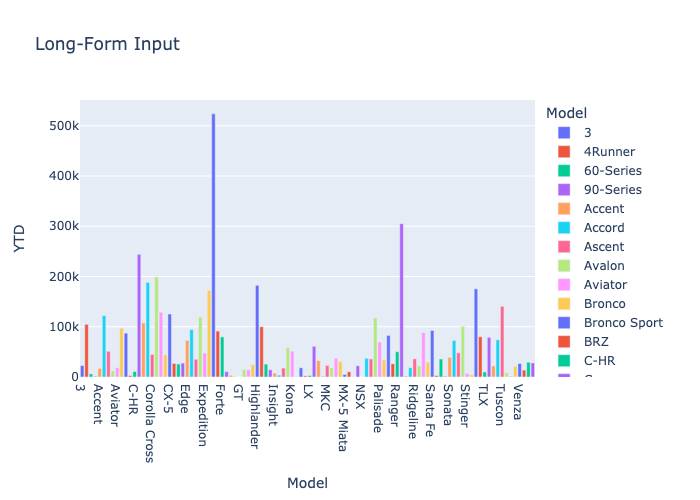

In [43]:
fig = px.bar(df, x="Model", y="YTD", color="Model", title="Long-Form Input")
fig.show("png")

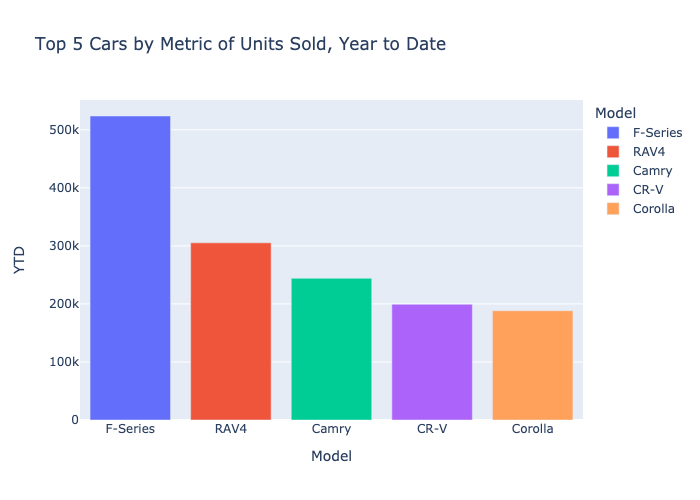

In [44]:
# I love the plotly graphs more than matplotlib because if you hover over the bars, or pie slices, violins, etc,
# it will give you the actual values 
fig = px.bar(topFive, x="Model", y="YTD", color="Model",title="Top 5 Cars by Metric of Units Sold, Year to Date")
  
# showing the plot
fig.show("png")

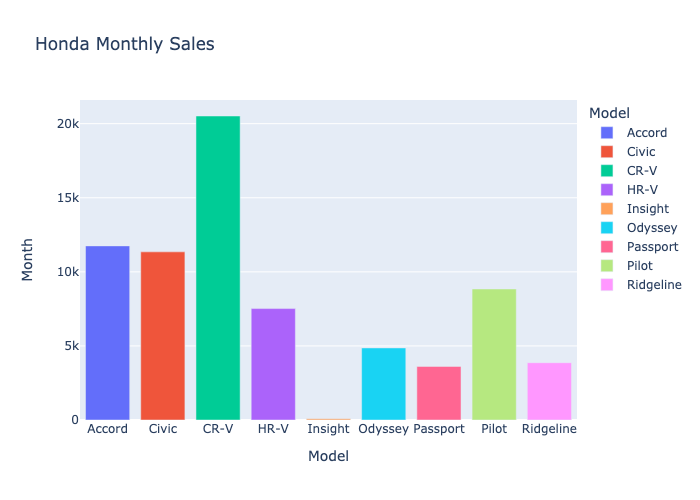

In [45]:
fig = px.bar(Honda, x="Model", y="Month", color="Model",title="Honda Monthly Sales")
  
# showing the plot
fig.show("png")

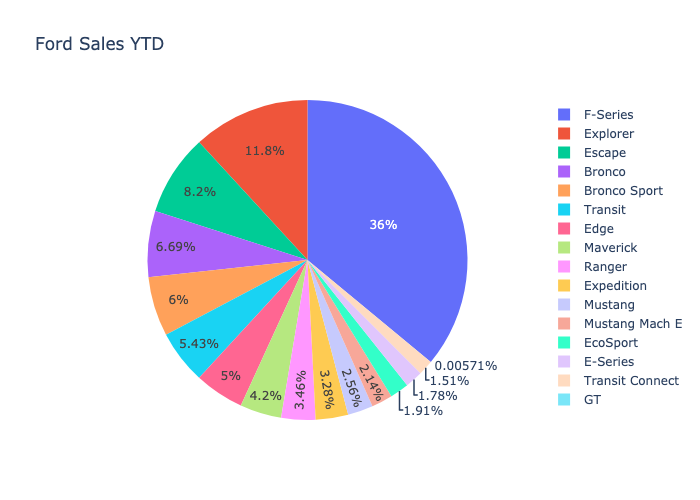

In [46]:
fig = px.pie(Ford, values="YTD", names="Model",title="Ford Sales YTD")  
# showing the plot
fig.show("png")

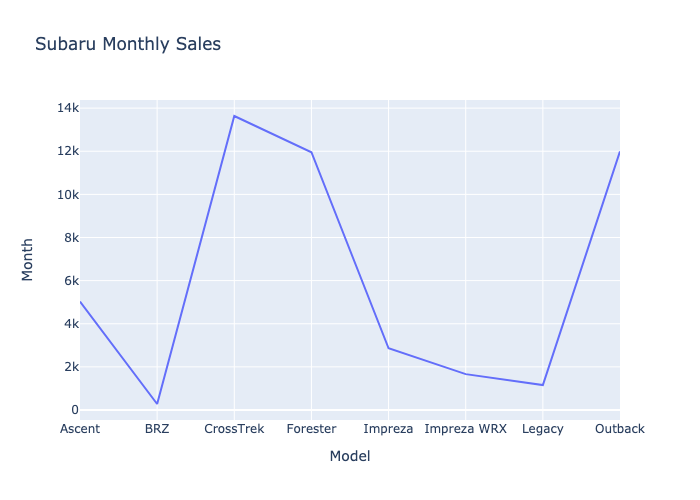

In [47]:
fig = px.line(Subaru, x="Model", y="Month",title="Subaru Monthly Sales") 
  
# showing the plot
fig.show("png")

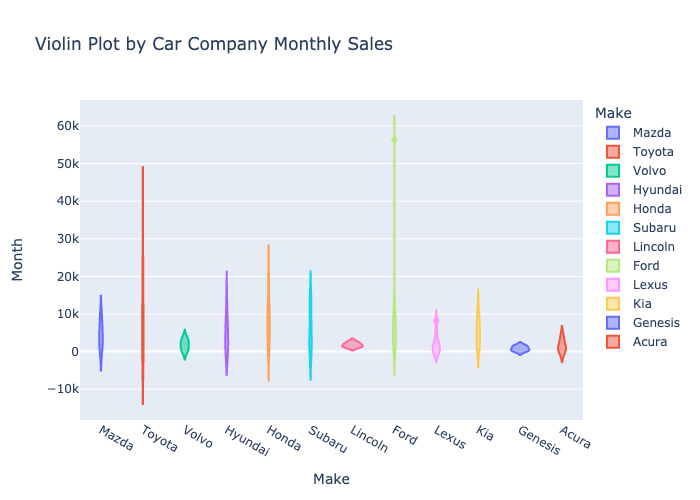

In [48]:
# Still getting used to this graph, but its awesome the way it adds descriptive statistics, and graphing into one.
fig = px.violin(df, x="Make", y="Month", color= "Make",title="Violin Plot by Car Company Monthly Sales") 

  
# showing the plot
fig.show("png")

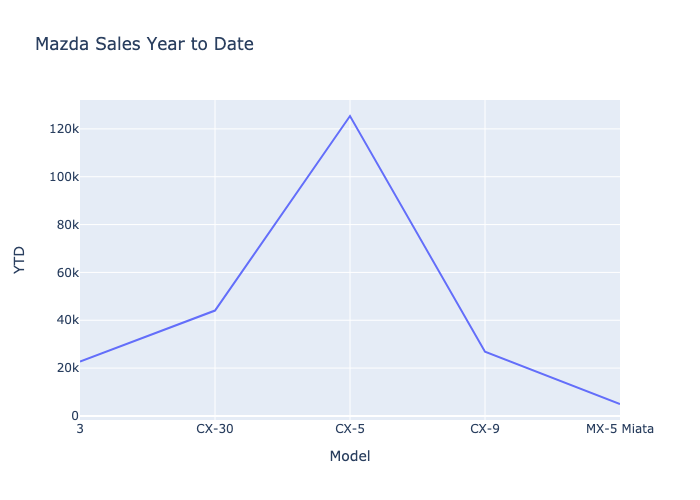

In [49]:
fig = px.line(Mazda, x="Model", y="YTD",title="Mazda Sales Year to Date")
fig.show("png")

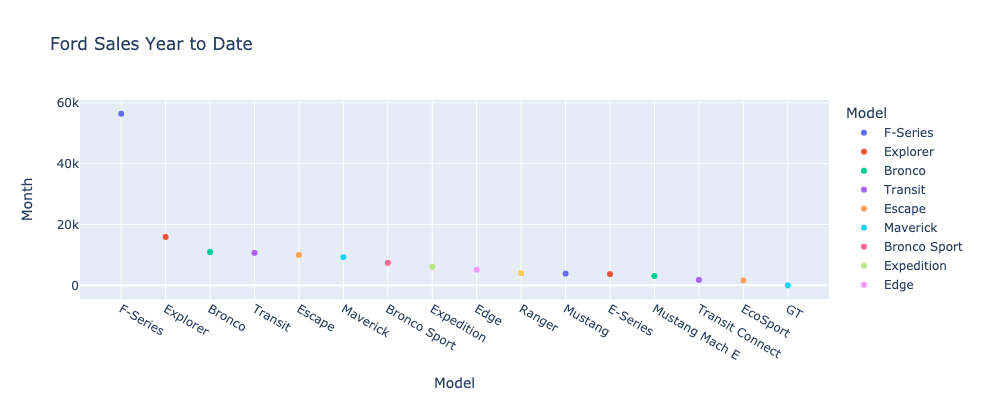

In [50]:
fig = px.scatter(moFordAsc, x="Model", y="Month", color="Model", width=1000, height=400,title="Ford Sales Year to Date")
 
# showing the plot
fig.show("png")

# V. Conclusion

In conclusion this data supports a bullish trend for the short term monthly sales of the recorded SUVs when compared to last years, with an average of 258 more cars sold this month, when compared to last years identical month. However there appears to be a bearish yearly trend when comparing this yearly sales, in comparison to last years, yearly sales, with an average difference of -9638 units not sold. If a SUV sold at least one more SUV this year, than it did last year, it would be above the 75% quartile of all year to date differences. The best selling SUV is by far the Ford F-series with 68,259 units sold monthly, and 603,089 units sold yearly, followed by the Toyota RAV4, as well as the Toyota Camry. The worst selling SUV was the Ford GT with yearly sales of 83, followed by the Acura NSX, and the Hyundai Nexo. On the monthly timeline the top selling SUV was also the Ford F-series with 68,259 units sold; the lowest selling SUV by monthly metric is the Hyundai Ioniq with only 1 unit sold this month. Top and bottom monthly and yearly sales are shown below.

In [51]:
df.describe()

,Month,Month LY,moDiff,moChangePerc,YTD,YTD LY,ytdDiff,ytdChangePerc
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,5917.903846,5659.153846,258.750000,26.221442,55991.692308,65629.798077,-9638.105769,57.889808
std,7956.857566,8153.266856,3044.756683,145.305642,73424.115136,86699.307532,24967.183611,543.034866
min,1.000000,5.000000,-11854.000000,-99.940000,83.000000,115.000000,-122341.000000,-88.760000
25%,1257.000000,1354.750000,-792.500000,-33.345000,11844.750000,16340.000000,-17109.750000,-36.067500
50%,3501.000000,3111.500000,-73.000000,-4.250000,29588.500000,34372.000000,-4898.000000,-15.620000
75%,8321.500000,7736.750000,777.500000,35.877500,79950.750000,79160.500000,-443.000000,-2.660000
max,56405.000000,68259.000000,12016.000000,1058.330000,523712.000000,603089.000000,79747.000000,5340.680000


In [52]:
# Top 5 Monthly sales
moSalesAsc.head(5)

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
33,Ford,F-Series,56405,68259,-11854,-17.37,Decay,523712,603089,-79377,-13.16,Decay
80,Toyota,RAV4,35089,24994,10095,40.39,Growth,305230,338441,-33211,-9.81,Decay
14,Toyota,Camry,29707,17691,12016,67.92,Growth,244110,274460,-30350,-11.06,Decay
97,Toyota,Tacoma,21051,14650,6401,43.69,Growth,175453,215251,-39798,-18.49,Decay
18,Honda,CR-V,20517,25393,-4876,-19.20,Decay,199204,315533,-116329,-36.87,Decay


In [53]:
# Top 5 yearly sales
topFive.head()

,Make,Model,Month,Month LY,moChangePerc,YTD,YTD LY,ytdChangePerc,moDiff,ytdDiff,moGrowth,ytdGrowth
33,Ford,F-Series,56405,68259,-17.37,523712,603089,-13.16,-11854,-79377,Decay,Decay
80,Toyota,RAV4,35089,24994,40.39,305230,338441,-9.81,10095,-33211,Growth,Decay
14,Toyota,Camry,29707,17691,67.92,244110,274460,-11.06,12016,-30350,Growth,Decay
18,Honda,CR-V,20517,25393,-19.20,199204,315533,-36.87,-4876,-116329,Decay,Decay
16,Toyota,Corolla,16663,8420,97.90,188219,200369,-6.06,8243,-12150,Growth,Decay


In [54]:
# Bottom 5 monthly sales
moSalesDsc.head(5)

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
51,Hyundai,Ioniq,1,1621,-1620,-99.94,Decay,3670,16467,-12797,-77.71,Decay
40,Ford,GT,8,12,-4,-33.33,Decay,83,115,-32,-27.83,Decay
71,Acura,NSX,25,5,20,400.00,Growth,236,123,113,91.87,Growth
69,Hyundai,Nexo,30,63,-33,-52.38,Decay,375,336,39,11.61,Growth
7,Toyota,Avalon,46,1172,-1126,-96.08,Decay,12190,15959,-3769,-23.62,Decay


In [55]:
# Bottom 5 yearly sales
dfYtdDsc.head(5)

,Make,Model,Month,Month LY,moDiff,moChangePerc,moGrowth,YTD,YTD LY,ytdDiff,ytdChangePerc,ytdGrowth
40,Ford,GT,8,12,-4,-33.33,Decay,83,115,-32,-27.83,Decay
71,Acura,NSX,25,5,20,400.00,Growth,236,123,113,91.87,Growth
69,Hyundai,Nexo,30,63,-33,-52.38,Decay,375,336,39,11.61,Growth
38,Genesis,G90,103,203,-100,-49.26,Decay,889,1469,-580,-39.48,Decay
56,Lexus,LC,102,178,-76,-42.70,Decay,1095,2550,-1455,-57.06,Decay
